# Capacity Ablation Study - Advanced Visualizations

This notebook creates publication-quality figures for the capacity ablation study using evidence-based visualization practices (avoiding bar charts, showing data distribution).

In [ ]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Get the notebook's directory
notebook_dir = Path.cwd()
print(f"Current directory: {notebook_dir}")

# Find project root (look for src directory as marker)
project_root = notebook_dir
while not (project_root / 'src').exists() and project_root != project_root.parent:
    project_root = project_root.parent.parent

if (project_root / 'src').exists():
    os.chdir(project_root)
    print(f"✓ Changed to project root: {project_root}")
else:
    print("⚠ Warning: Could not find project root, using current directory")

# Verify the files exist
results_path = Path('results/ablations/capacity/all_results.csv')
output_dir = Path('results/ablations/capacity/report')
output_dir.mkdir(parents=True, exist_ok=True)

print(f"\nFile checks:")
print(f"  Results CSV exists: {results_path.exists()}")
print(f"  Output directory: {output_dir}")

Current directory: /Users/katherinedemers/Documents/GitHub/diversity-mogfn/scripts/ablations
✓ Changed to project root: /Users/katherinedemers/Documents/GitHub/diversity-mogfn

File checks:
  Results CSV exists: True
  Output directory: results/ablations/capacity/report


In [2]:
# Load data
df = pd.read_csv('results/ablations/capacity/all_results.csv')

# Define ordering
capacity_order = ['small', 'medium', 'large', 'xlarge']
conditioning_order = ['concat', 'film']

# Create categorical ordering
df['capacity'] = pd.Categorical(df['capacity'], categories=capacity_order, ordered=True)
df['conditioning'] = pd.Categorical(df['conditioning'], categories=conditioning_order, ordered=True)

print(f"Loaded {len(df)} experiments")
print(f"\nCapacity levels: {df['capacity'].unique()}")
print(f"Conditioning types: {df['conditioning'].unique()}")
print(f"Seeds per config: {df.groupby(['capacity', 'conditioning']).size().values}")

# Define key metrics for visualization
continuous_metrics = [
    ('hypervolume', 'Hypervolume'),
    ('tds', 'Trajectory Diversity Score'),
    ('mce', 'Mode Coverage Entropy'),
    ('pas', 'Preference-Aligned Spread'),
    ('qds', 'Quality-Diversity Score'),
    ('fci', 'Flow Concentration Index'),
    ('der', 'Diversity-Efficiency Ratio')
]

count_metrics = [
    ('num_unique_solutions', 'Number of Unique Solutions'),
    ('num_modes', 'Number of Modes')
]

Loaded 40 experiments

Capacity levels: ['xlarge', 'large', 'medium', 'small']
Categories (4, object): ['small' < 'medium' < 'large' < 'xlarge']
Conditioning types: ['concat', 'film']
Categories (2, object): ['concat' < 'film']
Seeds per config: [5 5 5 5 5 5 5 5]


/var/folders/ms/4kq15lmn03x83f6cgky87ccm0000gn/T/ipykernel_26000/2901860158.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(f"Seeds per config: {df.groupby(['capacity', 'conditioning']).size().values}")


## 1. Raincloud Plots - Primary Visualization

Combines violin plot (distribution), boxplot (quartiles), and strip plot (raw data points).

In [3]:
# Install ptitprince if needed
try:
    import ptitprince as pt
except ImportError:
    print("Installing ptitprince for raincloud plots...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'ptitprince'])
    import ptitprince as pt

/Users/katherinedemers/Documents/GitHub/diversity-mogfn/.venv/lib/python3.9/site-packages/ptitprince/PtitPrince.py:154: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, group_df in self.plot_data.groupby(grouping_vars):
/Users/katherinedemers/Documents/GitHub/diversity-mogfn/.venv/lib/python3.9/site-packages/ptitprince/PtitPrince.py:154: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, group_df in self.plot_data.groupby(grouping_vars):
/Users/katherinedemers/Documents/GitHub/diversity-mogfn/.venv/lib/python3.9/site-packages/ptitprince/PtitPrince.py:154: FutureWarning: The default of 

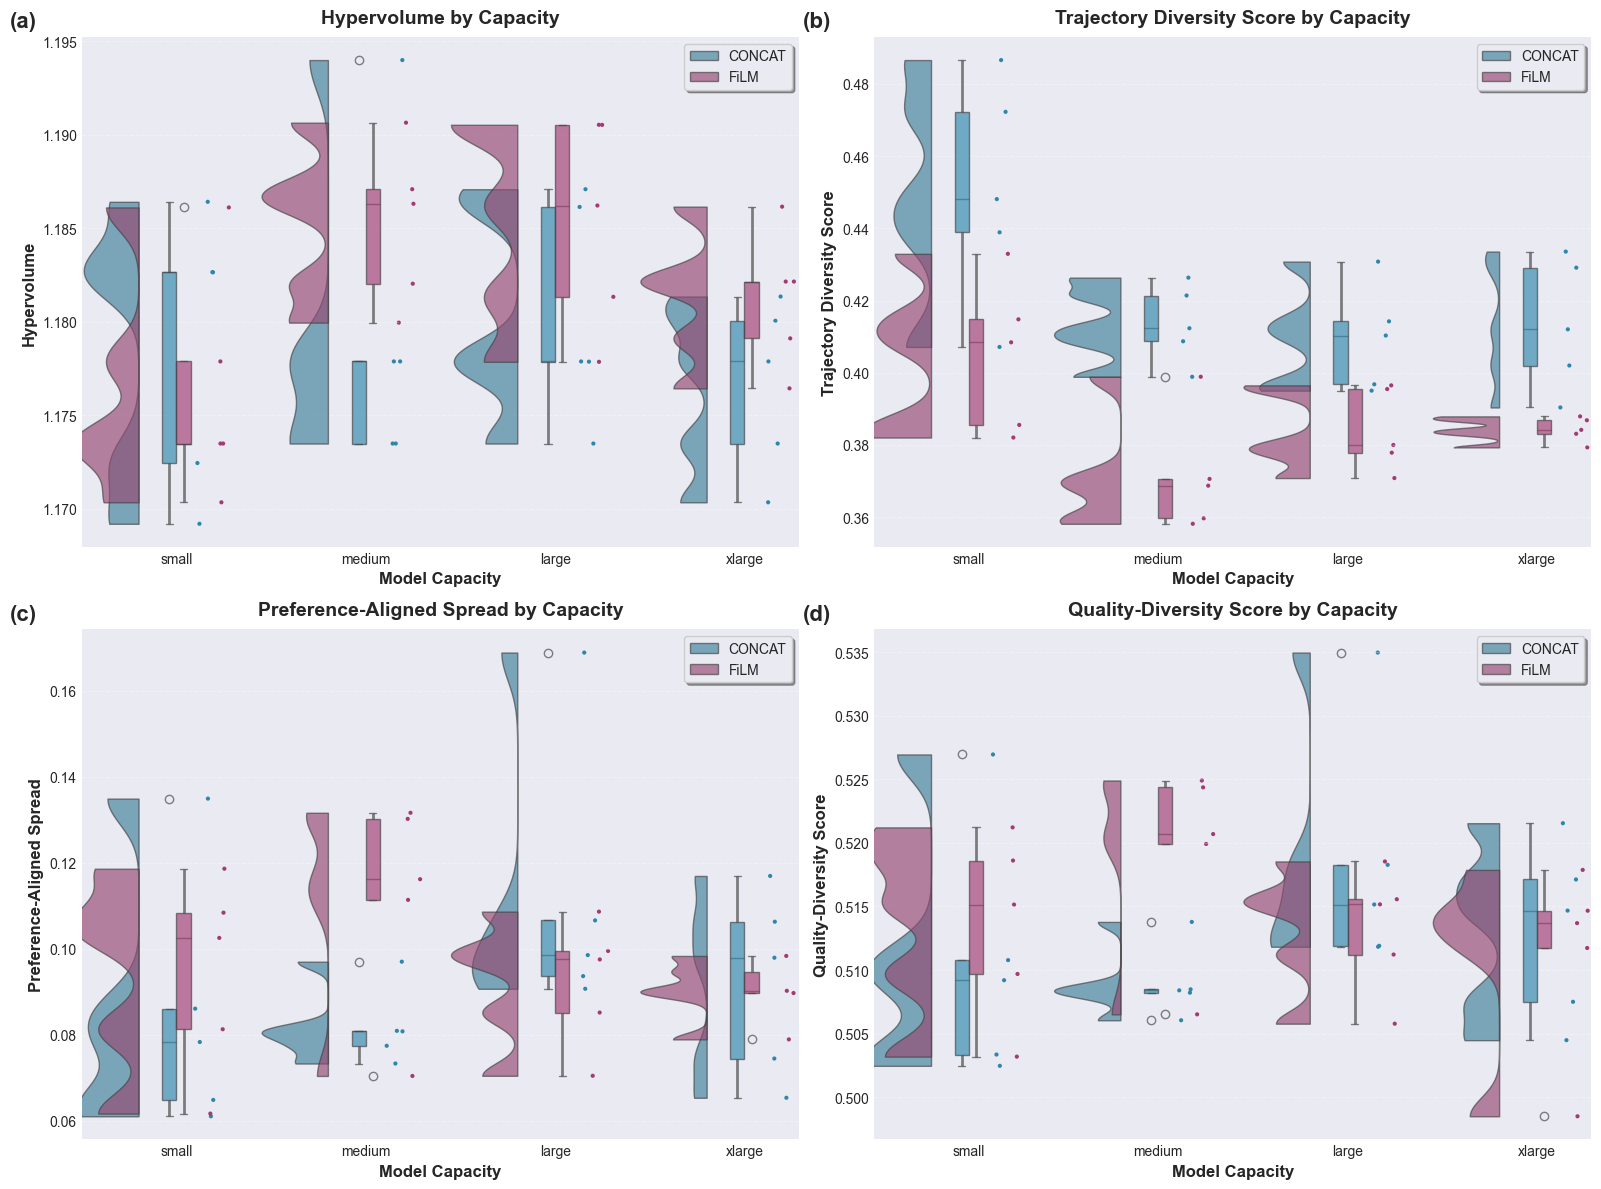

✓ Saved: raincloud_plots.pdf/png


In [4]:
# Create raincloud plots for key metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

key_metrics = [('hypervolume', 'Hypervolume'), 
               ('tds', 'Trajectory Diversity Score'),
               ('pas', 'Preference-Aligned Spread'),
               ('qds', 'Quality-Diversity Score')]

colors = ['#2E86AB', '#A23B72']  # concat, film

for idx, (metric, label) in enumerate(key_metrics):
    ax = axes[idx]
    
    # Create raincloud plot
    pt.RainCloud(
        data=df,
        x='capacity',
        y=metric,
        hue='conditioning',
        palette=colors,
        bw=0.2,
        width_viol=0.7,
        ax=ax,
        orient='v',
        alpha=0.65,
        dodge=True,
        pointplot=False,
        move=0.2
    )
    
    ax.set_xlabel('Model Capacity', fontsize=12, fontweight='bold')
    ax.set_ylabel(label, fontsize=12, fontweight='bold')
    ax.set_title(f'{label} by Capacity', fontsize=14, fontweight='bold', pad=10)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add panel label
    ax.text(-0.1, 1.05, f'({chr(97+idx)})', transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top')
    
    # Customize legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ['CONCAT', 'FiLM'], 
              loc='best', frameon=True, shadow=True, fontsize=10)

plt.tight_layout()
plt.savefig('results/ablations/capacity/report/raincloud_plots.pdf', dpi=300, bbox_inches='tight')
plt.savefig('results/ablations/capacity/report/raincloud_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: raincloud_plots.pdf/png")

## 2. Strip Plots with Violin Overlays

Shows all individual seed results with distribution shape.

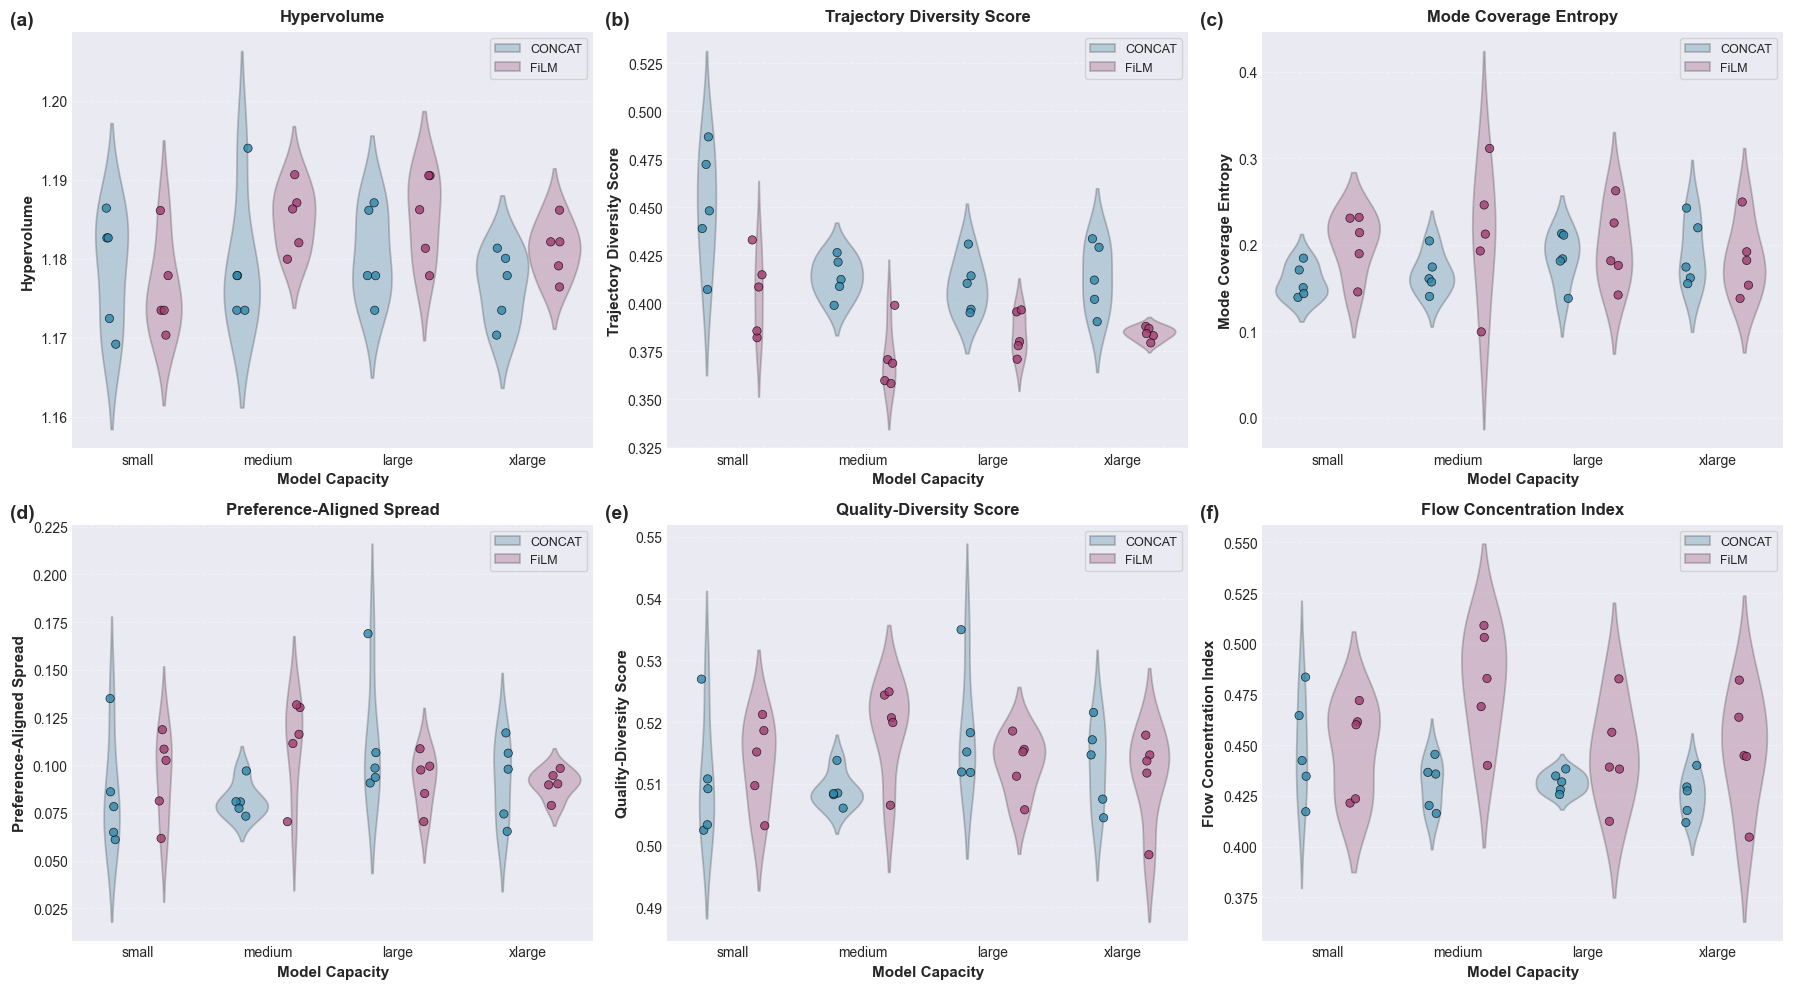

✓ Saved: strip_violin_plots.pdf/png


In [5]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metrics_to_plot = continuous_metrics[:6]

for idx, (metric, label) in enumerate(metrics_to_plot):
    ax = axes[idx]
    
    # Violin plot (distribution)
    sns.violinplot(
        data=df,
        x='capacity',
        y=metric,
        hue='conditioning',
        split=False,
        inner=None,
        palette=colors,
        alpha=0.3,
        ax=ax
    )
    
    # Strip plot (individual points)
    sns.stripplot(
        data=df,
        x='capacity',
        y=metric,
        hue='conditioning',
        dodge=True,
        palette=colors,
        alpha=0.8,
        size=6,
        edgecolor='black',
        linewidth=0.5,
        ax=ax
    )
    
    ax.set_xlabel('Model Capacity', fontsize=11, fontweight='bold')
    ax.set_ylabel(label, fontsize=11, fontweight='bold')
    ax.set_title(label, fontsize=12, fontweight='bold', pad=8)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Remove duplicate legend entries
    handles, labels_leg = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ['CONCAT', 'FiLM'], 
              loc='best', frameon=True, fontsize=9)
    
    # Add panel label
    ax.text(-0.12, 1.05, f'({chr(97+idx)})', transform=ax.transAxes,
            fontsize=14, fontweight='bold', va='top')

plt.tight_layout()
plt.savefig('results/ablations/capacity/report/strip_violin_plots.pdf', dpi=300, bbox_inches='tight')
plt.savefig('results/ablations/capacity/report/strip_violin_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: strip_violin_plots.pdf/png")

## 3. Line Plots with Individual Trajectories

Shows how each seed's performance changes across capacity levels.

/var/folders/ms/4kq15lmn03x83f6cgky87ccm0000gn/T/ipykernel_26000/2517394649.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_vals = df_cond.groupby('capacity')[metric].mean()
/var/folders/ms/4kq15lmn03x83f6cgky87ccm0000gn/T/ipykernel_26000/2517394649.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_vals = df_cond.groupby('capacity')[metric].mean()
/var/folders/ms/4kq15lmn03x83f6cgky87ccm0000gn/T/ipykernel_26000/2517394649.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior 

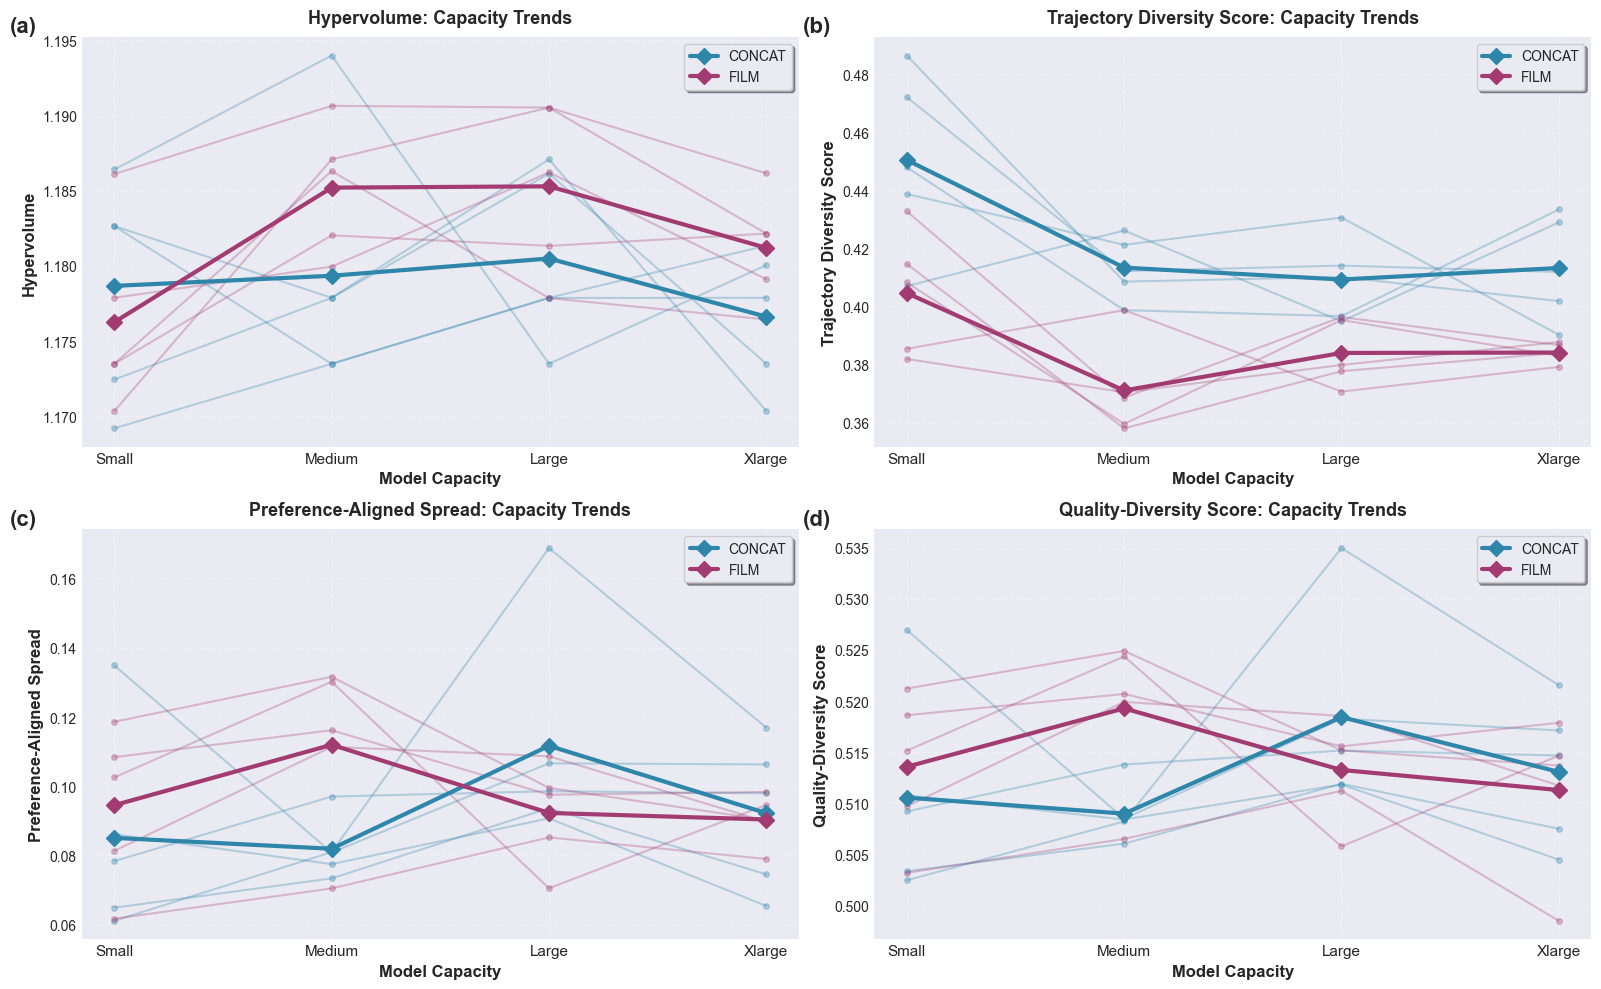

✓ Saved: trajectory_plots.pdf/png


In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, (metric, label) in enumerate(key_metrics):
    ax = axes[idx]
    
    for cond_idx, cond in enumerate(['concat', 'film']):
        df_cond = df[df['conditioning'] == cond]
        
        # Plot individual seed trajectories (light)
        for seed in df_cond['seed'].unique():
            df_seed = df_cond[df_cond['seed'] == seed].sort_values('capacity')
            ax.plot(df_seed['capacity'].cat.codes, df_seed[metric], 
                   color=colors[cond_idx], alpha=0.3, linewidth=1.5,
                   marker='o', markersize=4)
        
        # Plot mean trajectory (bold)
        mean_vals = df_cond.groupby('capacity')[metric].mean()
        ax.plot(range(len(capacity_order)), mean_vals, 
               color=colors[cond_idx], linewidth=3, 
               marker='D', markersize=8, 
               label=cond.upper(), zorder=10)
    
    ax.set_xticks(range(len(capacity_order)))
    ax.set_xticklabels([c.capitalize() for c in capacity_order], fontsize=11)
    ax.set_xlabel('Model Capacity', fontsize=12, fontweight='bold')
    ax.set_ylabel(label, fontsize=12, fontweight='bold')
    ax.set_title(f'{label}: Capacity Trends', fontsize=13, fontweight='bold', pad=10)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(loc='best', frameon=True, shadow=True, fontsize=10)
    
    # Add panel label
    ax.text(-0.1, 1.05, f'({chr(97+idx)})', transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top')

plt.tight_layout()
plt.savefig('results/ablations/capacity/report/trajectory_plots.pdf', dpi=300, bbox_inches='tight')
plt.savefig('results/ablations/capacity/report/trajectory_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: trajectory_plots.pdf/png")

## 4. Ridgeline Plots

Show distribution densities for each capacity level stacked vertically.

In [7]:
# Install joypy if needed
try:
    import joypy
except ImportError:
    print("Installing joypy for ridgeline plots...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'joypy'])
    import joypy

/Users/katherinedemers/Documents/GitHub/diversity-mogfn/.venv/lib/python3.9/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


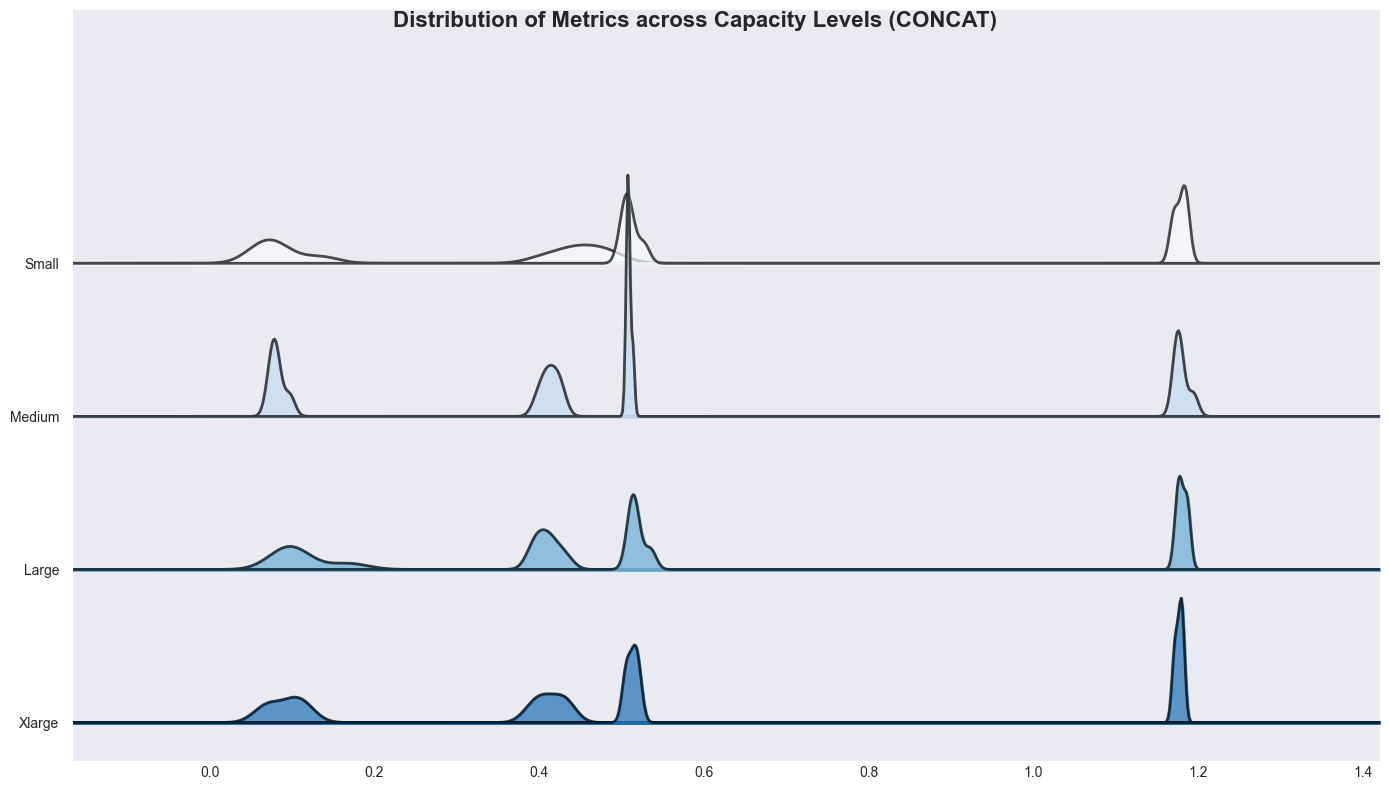

✓ Saved: ridgeline_concat.pdf/png


/Users/katherinedemers/Documents/GitHub/diversity-mogfn/.venv/lib/python3.9/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


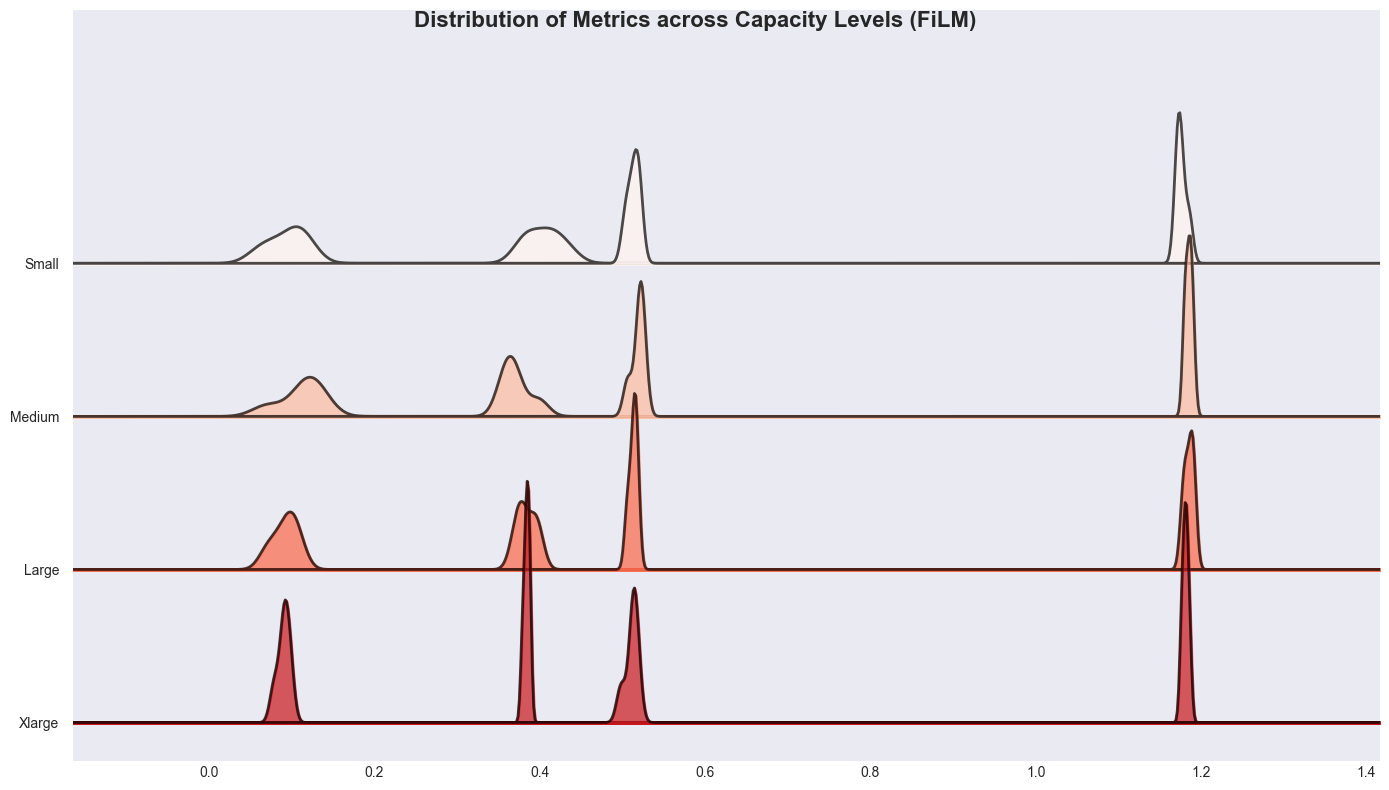

✓ Saved: ridgeline_film.pdf/png


In [8]:
# Create ridgeline plots for CONCAT conditioning
df_concat = df[df['conditioning'] == 'concat'].copy()
df_concat['capacity_label'] = df_concat['capacity'].apply(lambda x: x.capitalize())

fig, axes = joypy.joyplot(
    df_concat,
    column=['hypervolume', 'tds', 'pas', 'qds'],
    by='capacity_label',
    figsize=(14, 8),
    alpha=0.7,
    overlap=2,
    colormap=plt.cm.Blues,
    linewidth=2
)

plt.suptitle('Distribution of Metrics across Capacity Levels (CONCAT)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.savefig('results/ablations/capacity/report/ridgeline_concat.pdf', dpi=300, bbox_inches='tight')
plt.savefig('results/ablations/capacity/report/ridgeline_concat.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: ridgeline_concat.pdf/png")

# Create ridgeline plots for FiLM conditioning
df_film = df[df['conditioning'] == 'film'].copy()
df_film['capacity_label'] = df_film['capacity'].apply(lambda x: x.capitalize())

fig, axes = joypy.joyplot(
    df_film,
    column=['hypervolume', 'tds', 'pas', 'qds'],
    by='capacity_label',
    figsize=(14, 8),
    alpha=0.7,
    overlap=2,
    colormap=plt.cm.Reds,
    linewidth=2
)

plt.suptitle('Distribution of Metrics across Capacity Levels (FiLM)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.savefig('results/ablations/capacity/report/ridgeline_film.pdf', dpi=300, bbox_inches='tight')
plt.savefig('results/ablations/capacity/report/ridgeline_film.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: ridgeline_film.pdf/png")

## 5. Heatmap - Comprehensive Overview

Shows all metrics across all capacity × conditioning combinations.

/var/folders/ms/4kq15lmn03x83f6cgky87ccm0000gn/T/ipykernel_26000/271397925.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby(['capacity', 'conditioning']).agg({


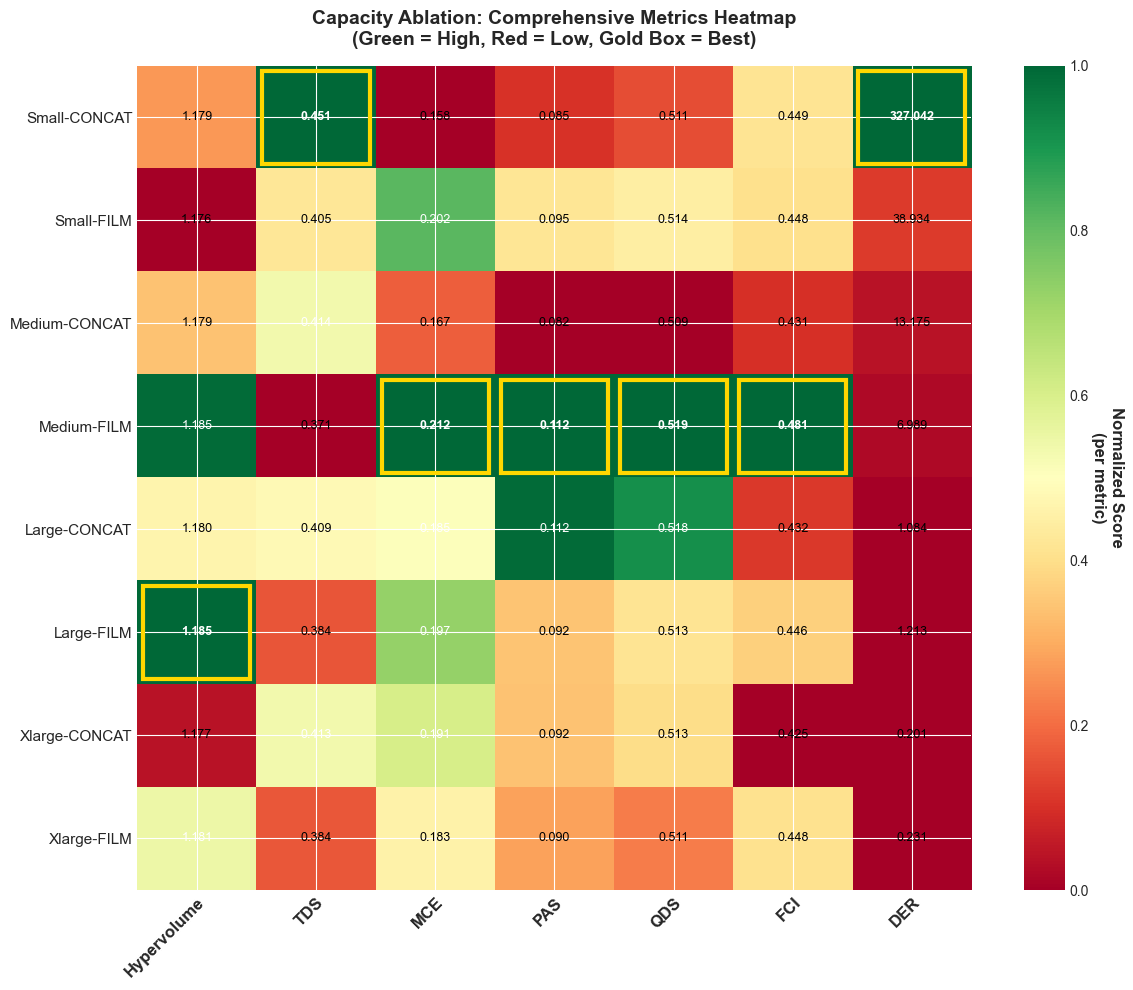

✓ Saved: metrics_heatmap.pdf/png


In [9]:
# Compute statistics
stats = df.groupby(['capacity', 'conditioning']).agg({
    'hypervolume': 'mean',
    'tds': 'mean',
    'mce': 'mean',
    'pas': 'mean',
    'qds': 'mean',
    'fci': 'mean',
    'der': 'mean'
}).reset_index()

# Prepare heatmap data
heatmap_data = []
row_labels = []
metric_names = ['Hypervolume', 'TDS', 'MCE', 'PAS', 'QDS', 'FCI', 'DER']
metric_cols = ['hypervolume', 'tds', 'mce', 'pas', 'qds', 'fci', 'der']

for cap in capacity_order:
    for cond in conditioning_order:
        row = stats[(stats['capacity'] == cap) & (stats['conditioning'] == cond)]
        if not row.empty:
            values = [row[col].values[0] for col in metric_cols]
            heatmap_data.append(values)
            row_labels.append(f'{cap.capitalize()}-{cond.upper()}')

heatmap_array = np.array(heatmap_data)

# Normalize each column for color mapping
heatmap_normalized = np.zeros_like(heatmap_array)
for i in range(heatmap_array.shape[1]):
    col = heatmap_array[:, i]
    heatmap_normalized[:, i] = (col - col.min()) / (col.max() - col.min() + 1e-10)

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(heatmap_normalized, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)

# Set labels
ax.set_xticks(np.arange(len(metric_names)))
ax.set_xticklabels(metric_names, fontsize=12, fontweight='bold')
ax.set_yticks(np.arange(len(row_labels)))
ax.set_yticklabels(row_labels, fontsize=11)

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Add values as text
for i in range(len(row_labels)):
    for j in range(len(metric_names)):
        value = heatmap_array[i, j]
        norm_value = heatmap_normalized[i, j]
        text_color = 'white' if norm_value > 0.5 else 'black'
        
        # Highlight best value with box
        is_best = value == heatmap_array[:, j].max()
        weight = 'bold' if is_best else 'normal'
        
        text = ax.text(j, i, f'{value:.3f}', 
                      ha='center', va='center',
                      color=text_color, fontsize=9, 
                      fontweight=weight)
        
        if is_best:
            from matplotlib.patches import Rectangle
            rect = Rectangle((j-0.45, i-0.45), 0.9, 0.9, 
                           linewidth=3, edgecolor='gold', 
                           facecolor='none', zorder=10)
            ax.add_patch(rect)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Normalized Score\n(per metric)', 
              rotation=270, labelpad=25, fontsize=12, fontweight='bold')

# Title
ax.set_title('Capacity Ablation: Comprehensive Metrics Heatmap\n' +
            '(Green = High, Red = Low, Gold Box = Best)', 
            fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.savefig('results/ablations/capacity/report/metrics_heatmap.pdf', dpi=300, bbox_inches='tight')
plt.savefig('results/ablations/capacity/report/metrics_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: metrics_heatmap.pdf/png")

## 6. Radar/Spider Chart - Configuration Comparison

Compare the best configurations across multiple metrics.

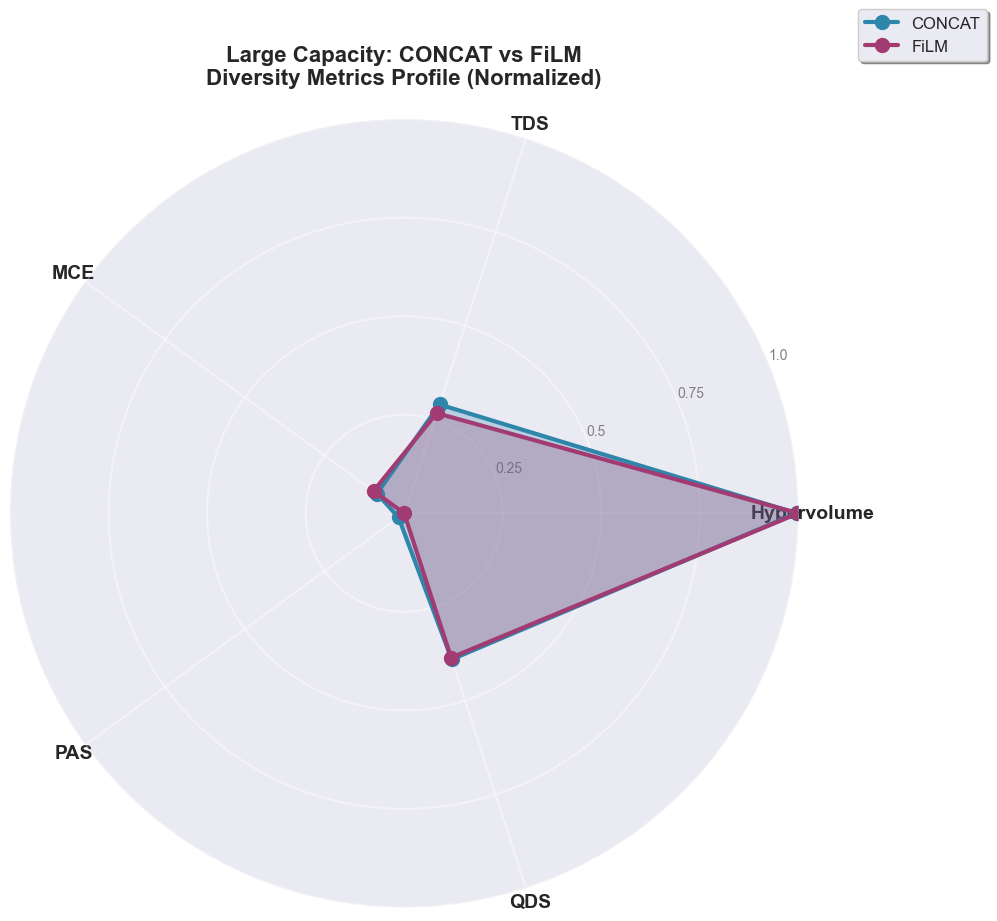

✓ Saved: radar_chart.pdf/png


In [10]:
# Compare the best capacity (large) between conditioning types
large_data = stats[stats['capacity'] == 'large']

concat_row = large_data[large_data['conditioning'] == 'concat']
film_row = large_data[large_data['conditioning'] == 'film']

# Extract values
metrics_for_radar = ['hypervolume', 'tds', 'mce', 'pas', 'qds']
radar_labels = ['Hypervolume', 'TDS', 'MCE', 'PAS', 'QDS']

concat_values = [concat_row[m].values[0] for m in metrics_for_radar]
film_values = [film_row[m].values[0] for m in metrics_for_radar]

# Normalize to [0, 1] for better visualization
all_values = concat_values + film_values
min_val, max_val = min(all_values), max(all_values)

concat_norm = [(v - min_val) / (max_val - min_val + 1e-10) for v in concat_values]
film_norm = [(v - min_val) / (max_val - min_val + 1e-10) for v in film_values]

# Complete the circle
concat_norm += concat_norm[:1]
film_norm += film_norm[:1]

# Setup angles
angles = [n / len(radar_labels) * 2 * pi for n in range(len(radar_labels))]
angles += angles[:1]

# Create radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Plot CONCAT
ax.plot(angles, concat_norm, 'o-', linewidth=3, 
        label='CONCAT', color='#2E86AB', markersize=10)
ax.fill(angles, concat_norm, alpha=0.25, color='#2E86AB')

# Plot FiLM
ax.plot(angles, film_norm, 'o-', linewidth=3, 
        label='FiLM', color='#A23B72', markersize=10)
ax.fill(angles, film_norm, alpha=0.25, color='#A23B72')

# Formatting
ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_labels, fontsize=14, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_yticks([0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0.25', '0.5', '0.75', '1.0'], fontsize=10, color='gray')
ax.grid(True, linewidth=1.5, alpha=0.4)

# Title and legend
ax.set_title('Large Capacity: CONCAT vs FiLM\n' +
            'Diversity Metrics Profile (Normalized)', 
            fontsize=16, fontweight='bold', pad=25)
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.15), 
         fontsize=12, frameon=True, shadow=True)

plt.tight_layout()
plt.savefig('results/ablations/capacity/report/radar_chart.pdf', dpi=300, bbox_inches='tight')
plt.savefig('results/ablations/capacity/report/radar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: radar_chart.pdf/png")

## 7. Parallel Coordinates Plot - Multi-metric Trade-offs

Show how configurations perform across multiple metrics simultaneously.

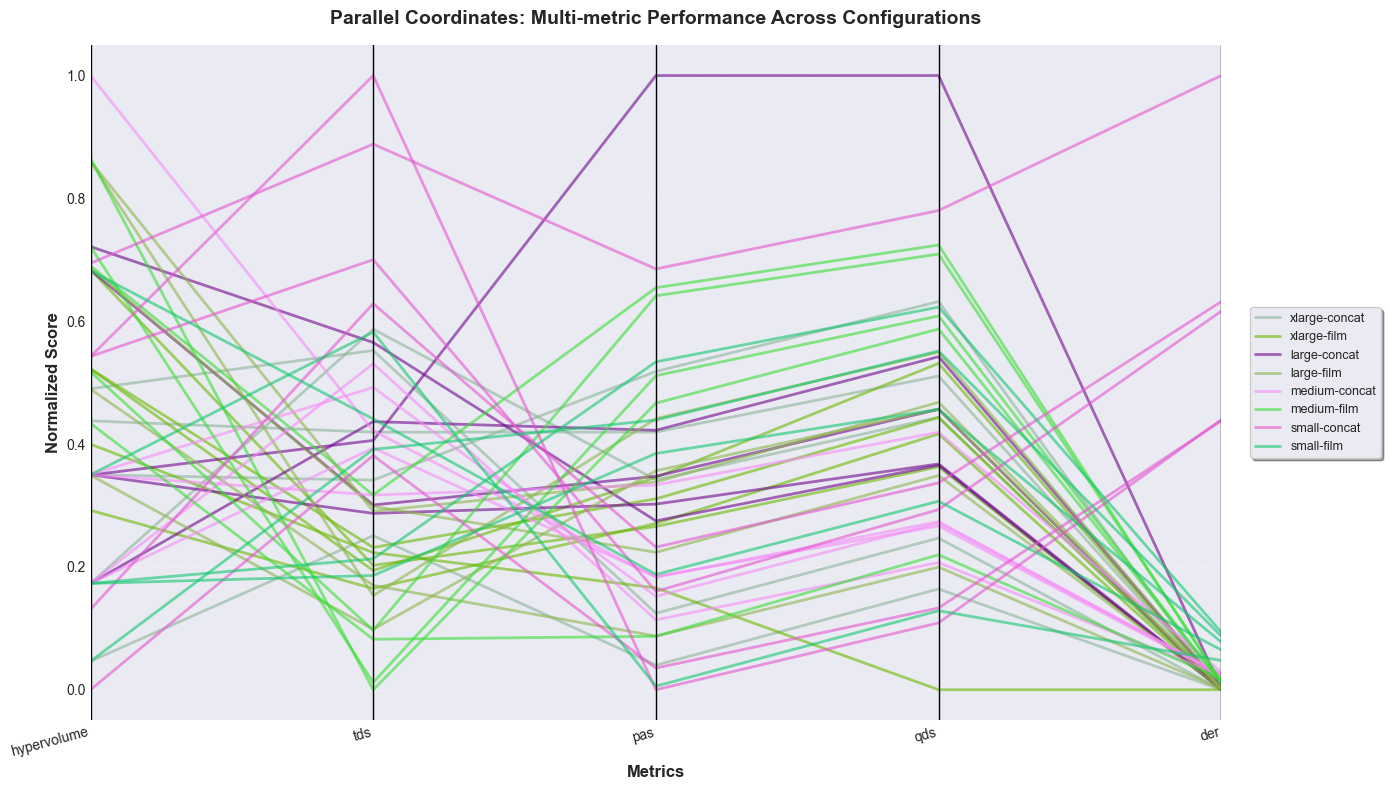

✓ Saved: parallel_coordinates.pdf/png


In [11]:
from pandas.plotting import parallel_coordinates

# Prepare data for parallel coordinates
df_parallel = df.copy()
df_parallel['config'] = df_parallel['capacity'].astype(str) + '-' + df_parallel['conditioning'].astype(str)

# Select metrics and normalize
parallel_metrics = ['hypervolume', 'tds', 'pas', 'qds', 'der']
df_plot = df_parallel[['config'] + parallel_metrics].copy()

# Normalize each metric to [0, 1]
for metric in parallel_metrics:
    min_val = df_plot[metric].min()
    max_val = df_plot[metric].max()
    df_plot[metric] = (df_plot[metric] - min_val) / (max_val - min_val + 1e-10)

# Create plot
fig, ax = plt.subplots(figsize=(14, 8))

parallel_coordinates(
    df_plot,
    'config',
    cols=parallel_metrics,
    ax=ax,
    alpha=0.6,
    linewidth=2
)

ax.set_ylabel('Normalized Score', fontsize=12, fontweight='bold')
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_title('Parallel Coordinates: Multi-metric Performance Across Configurations', 
            fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), 
         ncol=1, frameon=True, shadow=True, fontsize=9)

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=15, ha='right')

plt.tight_layout()
plt.savefig('results/ablations/capacity/report/parallel_coordinates.pdf', dpi=300, bbox_inches='tight')
plt.savefig('results/ablations/capacity/report/parallel_coordinates.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: parallel_coordinates.pdf/png")

## 8. Count Metrics - Bar Plots (Acceptable for Discrete Data)

Bar plots are appropriate for count data like number of unique solutions.

KeyError: 'num_unique_solutions'

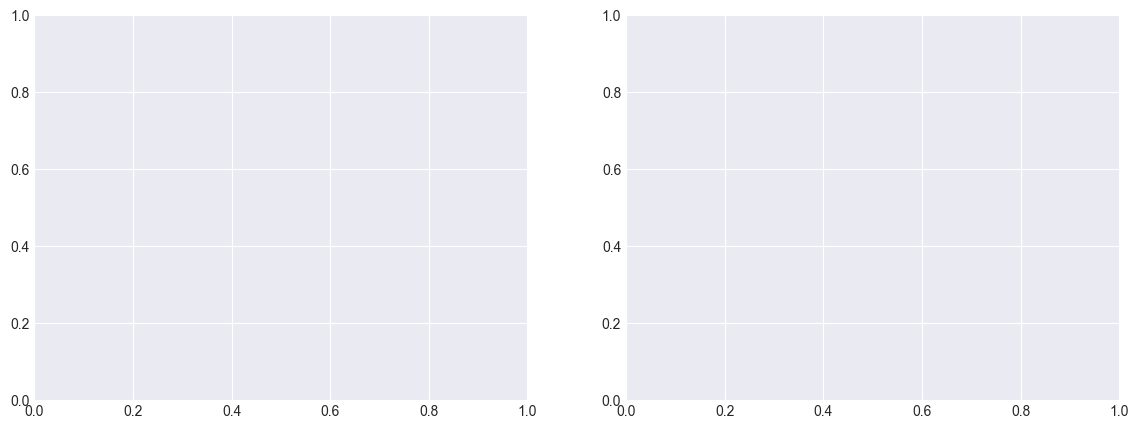

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

width = 0.35
x = np.arange(len(capacity_order))

for idx, (metric, label) in enumerate(count_metrics):
    ax = axes[idx]
    
    # Compute means and stds
    concat_means = []
    concat_stds = []
    film_means = []
    film_stds = []
    
    for cap in capacity_order:
        concat_vals = df[(df['capacity'] == cap) & (df['conditioning'] == 'concat')][metric]
        film_vals = df[(df['capacity'] == cap) & (df['conditioning'] == 'film')][metric]
        
        concat_means.append(concat_vals.mean())
        concat_stds.append(concat_vals.std())
        film_means.append(film_vals.mean())
        film_stds.append(film_vals.std())
    
    # Plot bars
    bars1 = ax.bar(x - width/2, concat_means, width, 
                   yerr=concat_stds, capsize=5,
                   label='CONCAT', color=colors[0], alpha=0.8,
                   edgecolor='black', linewidth=1.5)
    
    bars2 = ax.bar(x + width/2, film_means, width, 
                   yerr=film_stds, capsize=5,
                   label='FiLM', color=colors[1], alpha=0.8,
                   edgecolor='black', linewidth=1.5)
    
    ax.set_xlabel('Model Capacity', fontsize=12, fontweight='bold')
    ax.set_ylabel(label, fontsize=12, fontweight='bold')
    ax.set_title(label, fontsize=13, fontweight='bold', pad=10)
    ax.set_xticks(x)
    ax.set_xticklabels([c.capitalize() for c in capacity_order], fontsize=11)
    ax.legend(loc='best', frameon=True, shadow=True, fontsize=10)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add panel label
    ax.text(-0.12, 1.05, f'({chr(97+idx)})', transform=ax.transAxes,
            fontsize=14, fontweight='bold', va='top')

plt.tight_layout()
plt.savefig('results/ablations/capacity/report/count_metrics_bars.pdf', dpi=300, bbox_inches='tight')
plt.savefig('results/ablations/capacity/report/count_metrics_bars.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: count_metrics_bars.pdf/png")

## Summary

This notebook generated the following publication-quality figures:

1. **Raincloud plots** - Shows distribution + quartiles + raw data
2. **Strip + Violin plots** - Individual points with distribution shape
3. **Trajectory plots** - How metrics change across capacity levels
4. **Ridgeline plots** - Stacked density distributions
5. **Heatmap** - Comprehensive overview of all metrics
6. **Radar chart** - Multi-metric comparison for best configuration
7. **Parallel coordinates** - Multi-metric trade-offs
8. **Bar plots** - For count metrics only (acceptable use case)

All figures follow evidence-based visualization practices by:
- Showing individual data points (transparency)
- Revealing data distribution
- Avoiding misleading aggregations
- Using appropriate plot types for data characteristics